# Head size

In [36]:
import nibabel as nib, os, numpy as np, matplotlib.pyplot as plt

DIR = "../../data/gravo"

def get_scan_names(ct_type: str):
    dirname = os.path.join(DIR, ct_type)
    return [f for f in os.listdir(dirname) if f.endswith(".nii") and ("-" not in f)]

def get_size(ct_type: str, filename: str, verbose = True):
    file = os.path.join(DIR,ct_type,filename)
    scan = nib.load(file).get_fdata()
    c    = 0 
    inside_brain = False
    for i in range(scan.shape[-1]):
        slice = scan[:,:,i]
        empty = np.count_nonzero(slice) < 100
        if inside_brain and empty:
            if verbose:
                plt.imshow(np.flip(slice.T,0), cmap = "gray")
                plt.show()
            break
        elif not empty:
            if not inside_brain:
                start = i
                if verbose:
                    plt.imshow(np.flip(slice.T,0), cmap = "gray")
                    plt.show()
            inside_brain = True
        if inside_brain:
            c += 1
    return c, start, start+c

## NCCT

In [37]:
nccts = get_scan_names("NCCT")
out_ncct   = [get_size("NCCT", ncct, verbose = False) for ncct in nccts]
sizes_ncct = [out_ncct[i][0] for i in range(len(out_ncct))]
start_ncct = [out_ncct[i][1] for i in range(len(out_ncct))]
end_ncct   = [out_ncct[i][2] for i in range(len(out_ncct))]

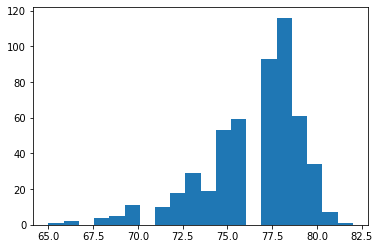

In [38]:
plt.hist(sizes_ncct, bins = 20)
plt.show()

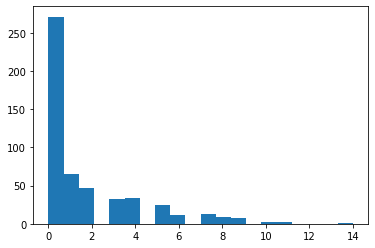

In [39]:
plt.hist(start_ncct, bins = 20)
plt.show()

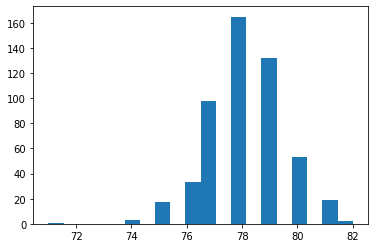

In [40]:
plt.hist(end_ncct, bins = 20)
plt.show()

## CTA 

In [27]:
ctas = get_scan_names("CTA")
out_cta   = [get_size("CTA", ncct, verbose = False) for cta in ctas]
sizes_cta = [out_cta[i][0] for i in range(len(out_cta))]
start_cta = [out_cta[i][1] for i in range(len(out_cta))]
end_cta   = [out_cta[i][2] for i in range(len(out_cta))]

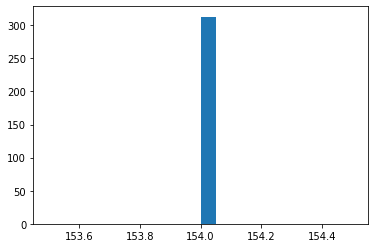

In [28]:
plt.hist(sizes_cta, bins = 20)
plt.show()

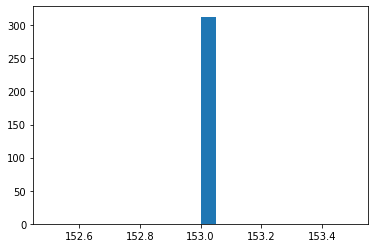

In [29]:
plt.hist(start_cta, bins = 20)
plt.show()

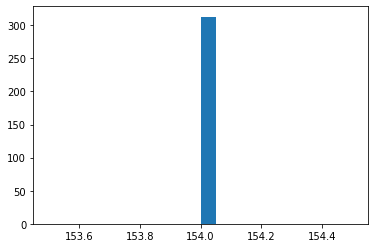

In [30]:
plt.hist(end_cta, bins = 20)
plt.show()